# Titanic Dataset Analysis

## By: Nick Patil
          14/12/2016

**1. Data Parsing**
---------------

Import the libraries to read, plot and analyse the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#**Use pandas to read the csv into the dataframe**

In [2]:
titanic1 = pd.read_csv('train.csv')
titanic2 = pd.read_csv('test.csv')

## Merge the two dataframes

In [3]:
titanic = pd.merge(titanic1, titanic2, how='outer')

##Take an overview of the data

In [4]:

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### There are few missing values for Age, Cabin columns
### Also Survived column has missing values for which we need to create a model for predictions

In [6]:
# The name column can be splitted into more meaningful columns for better analysis 
titanic.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [7]:
# Lets seperate the titles from the name 
coltitle = titanic['Name'].apply(lambda s: pd.Series({'Title': s.split(',')[1].split('.')[0].strip(),
                                                   'LastName':s.split(',')[0].strip(), 'FirstName':s.split(',')[1].split('.')[1].strip()}))
print (coltitle)

       Title       LastName                              FirstName
0         Mr         Braund                            Owen Harris
1        Mrs        Cumings  John Bradley (Florence Briggs Thayer)
2       Miss      Heikkinen                                  Laina
3        Mrs       Futrelle          Jacques Heath (Lily May Peel)
4         Mr          Allen                          William Henry
...      ...            ...                                    ...
1304      Mr        Spector                                  Woolf
1305    Dona  Oliva y Ocana                                Fermina
1306      Mr        Saether                        Simon Sivertsen
1307      Mr           Ware                              Frederick
1308  Master          Peter                              Michael J

[1309 rows x 3 columns]


In [8]:
# Add the columns to the titanic dataframe
titanic = pd.concat([titanic, coltitle], axis=1) 
# Drop the Name column
titanic.drop('Name', axis=1, inplace=True)
print (titanic.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1       0.0       3    male  22.0      1      0   
1            2       1.0       1  female  38.0      1      0   
2            3       1.0       3  female  26.0      0      0   
3            4       1.0       1  female  35.0      1      0   
4            5       0.0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked Title   LastName  \
0         A/5 21171   7.2500   NaN        S    Mr     Braund   
1          PC 17599  71.2833   C85        C   Mrs    Cumings   
2  STON/O2. 3101282   7.9250   NaN        S  Miss  Heikkinen   
3            113803  53.1000  C123        S   Mrs   Futrelle   
4            373450   8.0500   NaN        S    Mr      Allen   

                               FirstName  
0                            Owen Harris  
1  John Bradley (Florence Briggs Thayer)  
2                                  Laina  
3          Jacques Heath (Lily May Peel)  
4              

In [9]:
# Lets check the number of male and female
titanic.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [10]:
# Lets set a style for all the plots
print (style.available)
style.use('classic')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


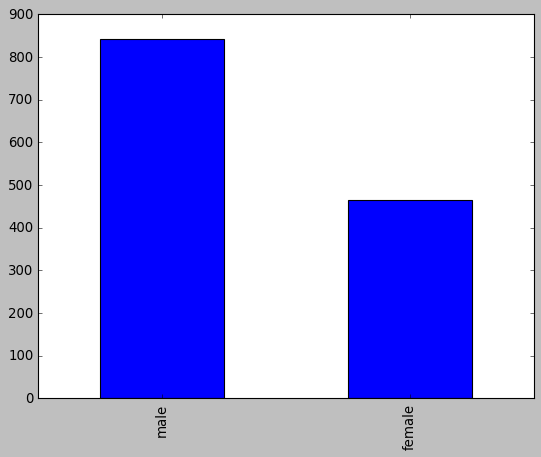

In [11]:
# Lets plot the number of male and females on the ship
titanic.Sex.value_counts().plot(kind='bar')
plt.show()

In [12]:
# Lets check the number of casualties on the ship
titanic.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

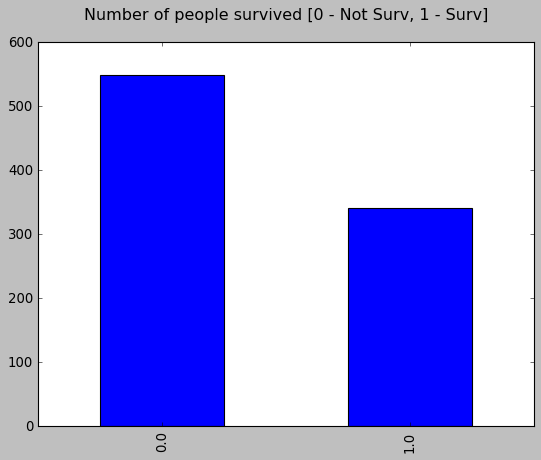

In [13]:
# Lets plot the casualties
titanic.Survived.value_counts().plot(kind='bar', title='Number of people survived [0 - Not Surv, 1 - Surv]\n')
plt.show()

## Lets now find number of passengers based on their Titles

In [14]:
# We can use the title column to get an inside
titanic.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [15]:
# Also reassign mlle, ms, and mme accordingly
titanic.loc[titanic['Title']=='Mlle', 'Title']='Miss'.strip()
titanic.loc[titanic['Title']=='Ms', 'Title']='Miss'.strip()
titanic.loc[titanic['Title']=='Mme', 'Title']='Mrs'.strip()

In [16]:
# Get the count of female and male passengers based on titles
tab = titanic.groupby(['Sex', 'Title']).size()
print (tab)

Sex     Title       
female  Dona              1
        Dr                1
        Lady              1
        Miss            264
        Mrs             198
        the Countess      1
male    Capt              1
        Col               4
        Don               1
        Dr                7
        Jonkheer          1
        Major             2
        Master           61
        Mr              757
        Rev               8
        Sir               1
dtype: int64


In [17]:
# Now lets get the count of unique surnames 
print (titanic.LastName.unique().shape[0])

875


##Total number of families on the ship

In [18]:
titanic['total_members'] = titanic.SibSp + titanic.Parch + 1


## Do families sink or swim together based on number of family members


----------


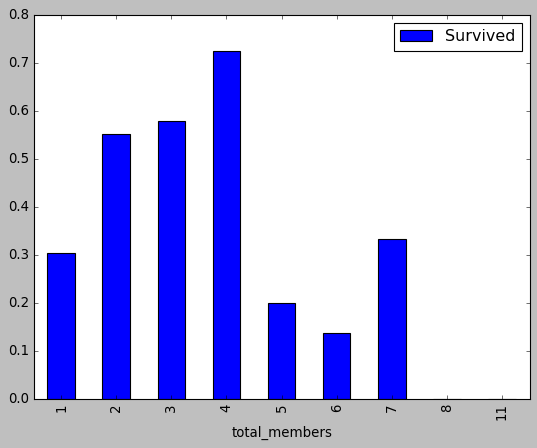

In [19]:
survivor = titanic[['Survived', 'total_members']].groupby('total_members').mean()
survivor.plot(kind='bar')
plt.show()

##We can see that there’s a survival penalty to singletons and those with family sizes above 4¶


In [20]:
titanic.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Sex                 0
Age               263
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            2
Title               0
LastName            0
FirstName           0
total_members       0
dtype: int64

##Drop unnecessary columns, these columns won't be useful in analysis and prediction

In [21]:
# Drop the Ticket and Cabin column 
titanic.drop('Cabin', axis=1, inplace=True)
titanic.drop('Ticket', axis=1, inplace=True)

In [22]:
# There is one missing value in Fare
titanic[titanic.Fare.isnull()==True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
1043,1044,NaN,3,male,60.5,0,0,NaN,S,Mr,Storey,Thomas,1


In [23]:
titanic[['Pclass', 'Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


In [24]:
titanic.loc[titanic.PassengerId==1044.0, 'Fare']=13.30

In [25]:
# Check the null values in Embarked column
titanic.Embarked.isnull().sum()

2

In [26]:
titanic[titanic['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
61,62,1.0,1,female,38.0,0,0,80.0,NaN,Miss,Icard,Amelie,1
829,830,1.0,1,female,62.0,0,0,80.0,NaN,Mrs,Stone,George Nelson (Martha Evelyn),1


## Impute missing value based on Survived column
We see that they paid 80 dollars respectively and their classes are 1 and 1, also they survived. So lets try to find where they embarked from.

In [27]:
# Lets try to find the embark based on survived
titanic[['Embarked', 'Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


We will go with C as the passengers survived and there is 55% chance for surviving with Embark C

In [28]:
# Also lets try to find the fare based on Embarked 
titanic[['Embarked', 'Fare']].groupby('Embarked').mean()

,Fare
Embarked,
C,62.336267
Q,12.409012
S,27.403377


##The fare they paid is 80 dollars which is close to C, hence we can impute C as the missing value. 

In [29]:
# Imputting the missing value
titanic.loc[titanic['Embarked'].isnull() == True, 'Embarked']='C'.strip()

## Check the missing values for Age

In [30]:
titanic.Age.isnull().sum()

263

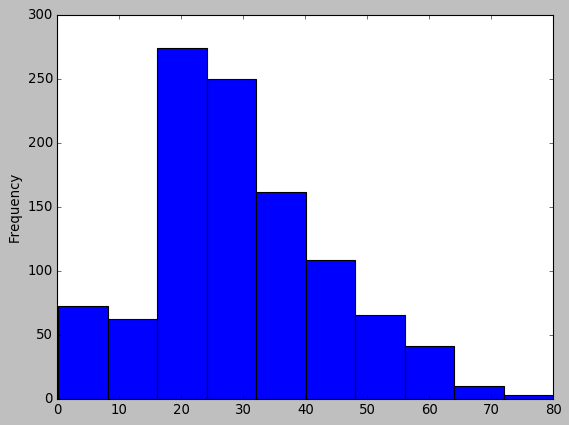

In [31]:
titanic.Age.plot(kind='hist')
plt.show()

##  The Age can be predicted based on Sex, Title and Pclass of existing customer and imputting the median age value.

In [32]:
pd.pivot_table(titanic, index=['Sex', 'Title', 'Pclass'], values=['Age'], aggfunc='median')

Age
Sex    Title        Pclass      
female Dona         1       39.0
       Dr           1       49.0
       Lady         1       48.0
       Miss         1       30.0
                    2       20.0
                    3       18.0
       Mrs          1       45.0
                    2       30.5
                    3       31.0
       the Countess 1       33.0
male   Capt         1       70.0
       Col          1       54.5
       Don          1       40.0
       Dr           1       47.0
                    2       38.5
       Jonkheer     1       38.0
       Major        1       48.5
       Master       1        6.0
                    2        2.0
                    3        6.0
       Mr           1       41.5
                    2       30.0
                    3       26.0
       Rev          2       41.5
       Sir          1       49.0

In [33]:
# a function that fills the missing values of the Age variable
    
def fillAges(row):
    
    if row['Sex']=='female' and row['Pclass'] == 1:
        if row['Title'] == 'Miss':
            return 29.5
        elif row['Title'] == 'Mrs':
            return 38.0
        elif row['Title'] == 'Dr':
            return 49.0
        elif row['Title'] == 'Lady':
            return 48.0
        elif row['Title'] == 'the Countess':
            return 33.0

    elif row['Sex']=='female' and row['Pclass'] == 2:
        if row['Title'] == 'Miss':
            return 24.0
        elif row['Title'] == 'Mrs':
            return 32.0

    elif row['Sex']=='female' and row['Pclass'] == 3:
        
        if row['Title'] == 'Miss':
            return 9.0
        elif row['Title'] == 'Mrs':
            return 29.0

    elif row['Sex']=='male' and row['Pclass'] == 1:
        if row['Title'] == 'Master':
            return 4.0
        elif row['Title'] == 'Mr':
            return 36.0
        elif row['Title'] == 'Sir':
            return 49.0
        elif row['Title'] == 'Capt':
            return 70.0
        elif row['Title'] == 'Col':
            return 58.0
        elif row['Title'] == 'Don':
            return 40.0
        elif row['Title'] == 'Dr':
            return 38.0
        elif row['Title'] == 'Major':
            return 48.5

    elif row['Sex']=='male' and row['Pclass'] == 2:
        if row['Title'] == 'Master':
            return 1.0
        elif row['Title'] == 'Mr':
            return 30.0
        elif row['Title'] == 'Dr':
            return 38.5

    elif row['Sex']=='male' and row['Pclass'] == 3:
        if row['Title'] == 'Master':
            return 4.0
        elif row['Title'] == 'Mr':
            return 22.0


titanic['Age'] = titanic.apply(lambda s: fillAges(s) if np.isnan(s['Age']) else s['Age'], axis=1)


##Plot after imputting the missing values

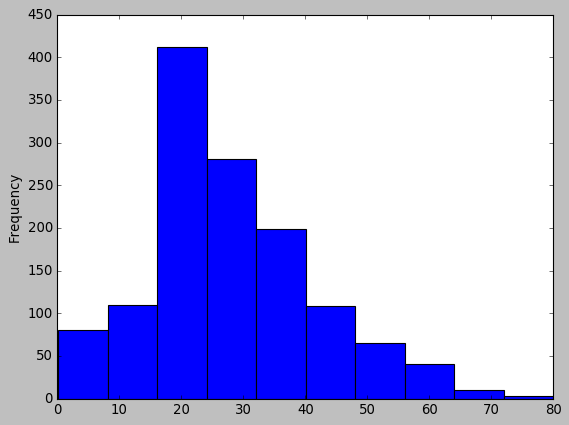

In [34]:
titanic.Age.plot(kind='hist')
plt.show()

# Prediction for Survived

###Sex, Pclass, Age, Embarked, Kids, Mother, total_members

In [35]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Sex            1309 non-null   object 
 4   Age            1309 non-null   float64
 5   SibSp          1309 non-null   int64  
 6   Parch          1309 non-null   int64  
 7   Fare           1309 non-null   float64
 8   Embarked       1309 non-null   object 
 9   Title          1309 non-null   object 
 10  LastName       1309 non-null   object 
 11  FirstName      1309 non-null   object 
 12  total_members  1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


##Convert objects to numeric for predictions

In [36]:
# Convert sex to 0 and 1 (Female and Male)
def trans_sex(x):
    if x == 'female':
        return 0
    else:
        return 1
titanic['Sex'] = titanic['Sex'].apply(trans_sex)

# Convert Embarked to 1, 2, 3 (S, C, Q)
def trans_embark(x):
    if x == 'S':
        return 3
    if x == 'C':
        return 2
    if x == 'Q':
        return 1
titanic['Embarked'] = titanic['Embarked'].apply(trans_embark)    
    

In [37]:
# Add a child and mother column for predicting survivals
titanic['Child'] = 0
titanic.loc[titanic['Age']<18.0, 'Child'] = 1
titanic['Mother'] = 0
titanic.loc[(titanic['Age']>18.0) & (titanic['Parch'] > 0.0) & (titanic['Sex']==0) & (titanic['Title']!='Miss'), 'Mother'] =1

##predict who survives among passengers of the Titanic based on variables that we carefully curated and treated for missing values

In [38]:
titanic.isnull().sum()

PassengerId        0
Survived         418
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Title              0
LastName           0
FirstName          0
total_members      0
Child              0
Mother             0
dtype: int64

##We divide the datasource into training and test data based on Null values in Survived column

In [39]:
# Feature selection for doing the predictions
features_label = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'total_members', 'Child', 'Mother']
target_label= ['Survived']
train = titanic[titanic['Survived'].isnull()!= True]
test = titanic[titanic['Survived'].isnull()== True]


In [40]:
print (train.shape)
print (test.shape)

(891, 15)
(418, 15)


##Random Forest Regression 

In [41]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X=train[features_label], y=train[target_label])

Y_pred = random_forest.predict(X=test[features_label])

random_forest.score(X=train[features_label], y=train[target_label])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.978675645342312

##Using Logistic Regression to predict and imputing the predicted values into the Survived column with null values

In [42]:
# Logistic Regression
regr = LogisticRegression()
regr.fit(X=train[features_label], y=train[target_label])
regr.score(X=train[features_label], y=train[target_label])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8035914702581369

In [43]:
# Predicted Values for Survived
predict_t = regr.predict(X=test[features_label])
print (predict_t)

[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.

In [44]:
# Insert the predicted values for the missing rows for Survived column
titanic.loc[titanic['Survived'].isnull()== True, 'Survived']= predict_t

##Extra Trees model for selecting Features based on importance

In [45]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X=train[features_label], y=train[target_label])
# display the relative importance of each attribute
importance = model.feature_importances_
print (importance)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.11101695 0.27992233 0.20951833 0.03307348 0.02193866 0.22258877
 0.0350786  0.0414355  0.03176836 0.01365903]


               importance
feature                  
Sex                 0.280
Fare                0.223
Age                 0.210
Pclass              0.111
total_members       0.041
Embarked            0.035
SibSp               0.033
Child               0.032
Parch               0.022
Mother              0.014


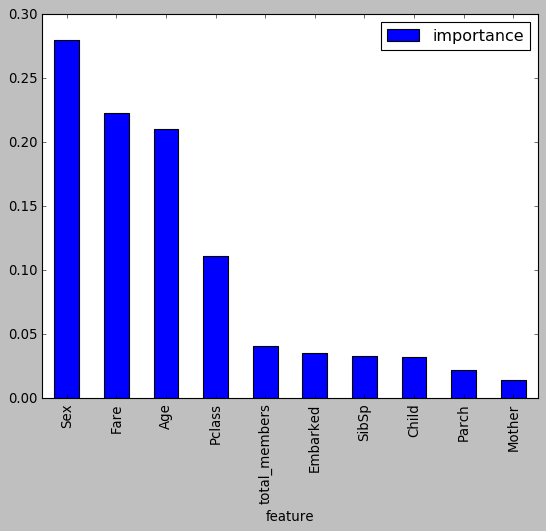

In [46]:
# model is of type array, convert to type dataframe

imp = pd.DataFrame({'feature':features_label,'importance':np.round(model.feature_importances_,3)})
imp = imp.sort_values('importance',ascending=False).set_index('feature')
print (imp)
imp.plot.bar()
plt.show()

##passengers who survived based on sex, class, child and mothers

In [47]:
print ("\nThe number of passengers based on Sex\n")
print (titanic['Sex'].value_counts()) 

print ("\nThe number of survivors based on Sex\n")
print(titanic[['Survived', 'Sex']].groupby('Sex').sum()) 

print ("\nThe number of passengers based on Pclass\n")
print (titanic['Pclass'].value_counts())
       
print("\nThe number of survivors based on Pclass\n")
print(titanic[['Survived', 'Pclass']].groupby('Pclass').sum()) 

print ("\nThe number of passengers who are Mother\n")
print (titanic['Mother'].value_counts())
       
print ("\nThe number of survivors based on Mother\n")
print (titanic[['Survived', 'Mother']].groupby('Mother').sum())


The number of passengers based on Sex

1    843
0    466
Name: Sex, dtype: int64

The number of survivors based on Sex

     Survived
Sex          
0       369.0
1       123.0

The number of passengers based on Pclass

3    709
1    323
2    277
Name: Pclass, dtype: int64

The number of survivors based on Pclass

        Survived
Pclass          
1          198.0
2          118.0
3          176.0

The number of passengers who are Mother

0    1224
1      85
Name: Mother, dtype: int64

The number of survivors based on Mother

        Survived
Mother          
0          424.0
1           68.0


# Inferences
### From the above more females survived then men, More of VIP Pclass(1) passengers survived then common passengers, Mother survivor is also high

## Convert the columns to their string values

In [48]:
# Convert sex to 0 and 1 (Female and Male)
def trans_sex(x):
    if x == 0:
        return 'female'
    else:
        return 'male'
titanic['Sex'] = titanic['Sex'].apply(trans_sex)

# Convert Embarked to 1, 2, 3 (S, C, Q)
def trans_embark(x):
    if x == 3:
        return 'S'
    if x == 2:
        return 'C'
    if x == 1:
        return 'Q'
titanic['Embarked'] = titanic['Embarked'].apply(trans_embark) 

## Export the data into a CSV file

In [49]:
titanic.to_csv('titanic.csv')

##Summary:
Thanks Kaggle for the opportunity to do this project. As I am new to Data Science enjoyed doing it. 
Suggestions are welcome.
